In [1]:
import tensorflow as tf
import os, glob
import numpy as np
import matplotlib.pyplot as plt

from models import *
from tSNE_plot import *

In [2]:
load_dir = 'train_result/train_5/'

In [368]:
x_test = np.load('%s/x_test.npy'%(load_dir))
x_train = np.load('%s/x_train.npy'%(load_dir))
y_test = np.load('%s/y_test.npy'%(load_dir))
y_name = np.load('./data/w58y67/preprocessing_2/step_1/wav_name.npy')
print('* data shape: ', x_test.shape)

* data shape:  (5173, 128, 64, 1)


In [4]:
encoder, decoder, vae = build_vae(x_test, 10)

In [5]:
vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 64, 1)]      0         
_________________________________________________________________
encoder (Model)              [(None, 10), (None, 10),  361396    
_________________________________________________________________
decoder (Model)              (None, 128, 64, 1)        359809    
Total params: 721,205
Trainable params: 721,205
Non-trainable params: 0
_________________________________________________________________


In [6]:
ckp_dir = load_dir+'/ckp/'
checkpoint = tf.train.Checkpoint(step=tf.Variable(1), encoder=encoder, decoder=decoder, vae=vae)
checkpoint.restore(tf.train.latest_checkpoint(ckp_dir))

In [7]:
x_input = x_test/255
x_rec = vae.predict(x_input)
z_lat = encoder.predict(x_input)[2]

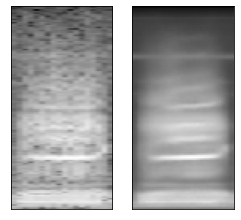

In [8]:
plot_recimg(6, x_test, x_rec)

In [259]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,
#perplexity=20, early_exaggeration=12.0,
   #learning_rate=200.0, n_iter=300, n_iter_without_progress=300,
     min_grad_norm=1e-07, metric='euclidean', init='random', verbose=0,
#     random_state=None, method='barnes_hut', angle=0.5
           )
tsne_val = tsne.fit_transform(z_lat)
tsne_val.shape

(5173, 2)

In [261]:
from sklearn.cluster import KMeans

n_cluster=15

model = KMeans(init="k-means++", n_clusters=n_cluster, random_state=0, max_iter = 5
#model = KMeans(n_clusters=n_cluster, init="k-means++", 
#               n_init=100, max_iter=100, tol=0.00001, 
#            precompute_distances=’auto’,)
#           verbose=0, random_state=None, copy_x=True, 
               #, algorithm=’auto’)
              )
model.fit(tsne_val)
y_pred = model.labels_

-73.11449432373047 71.7082748413086 -64.84007263183594 75.13594055175781


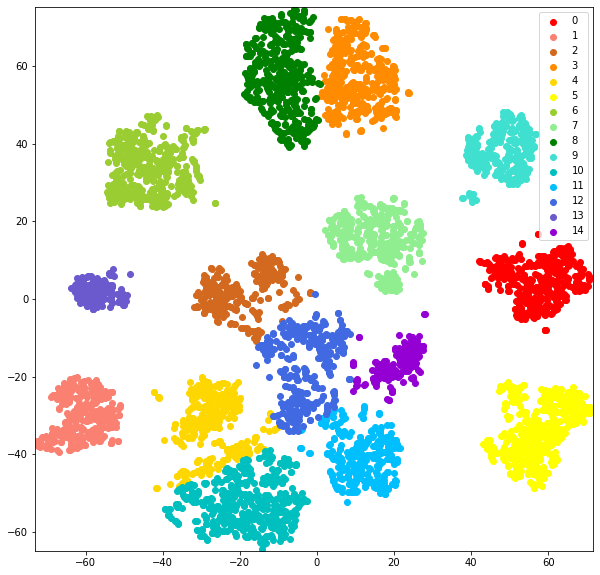

In [308]:
plot_scatter(tsne_val, y_pred, save='%s/%s'%(load_dir, 'scatter'))

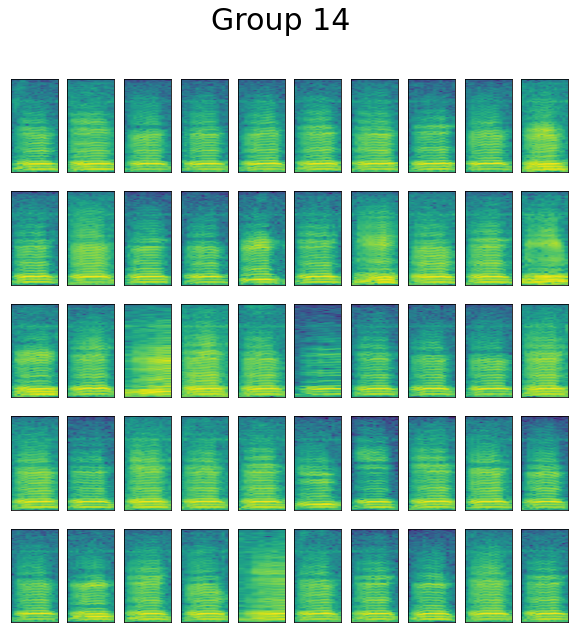

In [279]:
idx = 14
#plot_scatter(tsne_val, y_pred, idx, size =8)
plot_group(x_test, y_pred, idx, load_dir)

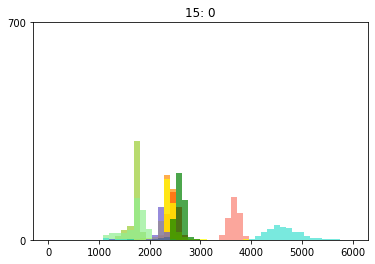

In [363]:
good_id=[0,1,3,5,6,7,8,9,13]
bad_id = [2,4,10,11,12,14,15]

plt.title( '%i: %i'%(idx, len(gx)))
for i in good_id:
    cond = y_pred==i
    gx = x_test[cond]
    gy = y_test[cond]
    plt.hist(gy[:,2], range=(0,6000), color = c_list[i], bins=50, alpha=0.7)


plt.yticks([0,700])
#plt.show()
plt.savefig('%s/lenth_good'%(load_dir))

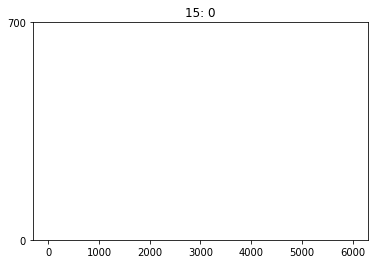

In [362]:
idx = 15

cond = y_pred==idx
gx = x_test[cond]
gy = y_test[cond]

fig = plt.figure()
plt.title( '%i: %i'%(idx, len(gx)))
plt.hist(gy[:,2], range=(0,6000), color = c_list[idx], bins=50, alpha=0.7)
plt.yticks([0,700])
#plt.show()
plt.savefig('%s/lenth_%i'%(load_dir, idx))

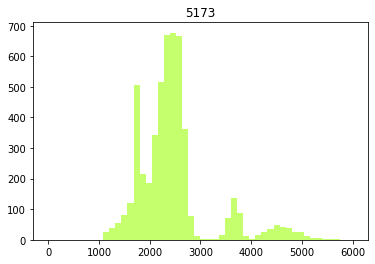

In [365]:
plt.title( len(y_test))
plt.hist(y_test[:,2], range=(0,6000), bins=50, color = c_base, alpha=0.7)
plt.savefig('%s/lenth'%load_dir)
plt.show()

In [369]:
idx = 0
y_name[y_test[:,0][idx]]

'w58y67_20200417_161817_203'

In [185]:
suml

5173